# "Kaggle_exercise - Titanic_1"
> "Kaggle_exercise - Titanic_1"

- toc:true
- branch: master
- badges: true
- comments: true
- author: jaeeon
- categories: [jupyter, python, colab]

## Kaggle API 사용

1. Account의 API에서 `create New API Token` Click!
2. kaggle.json 파일의 username과 key 확인
3. C:\Users\윈도우사용자명\.kaggle 에 저장
4. anaconda prompt에서 `conda install -c conda-forge kaggle` 입력
5. 설치 됬는지 확인 : `conda install kaggle`
6. titanic data file download : `!kaggle competitions download -c titanic`

In [2]:
# kaggle.json 파일의 username과 key 가져오기
import os
os.environ['KAGGLE_USERNAME'] = "jyaeon"
os.environ['KAGGLE_KEY'] = "af9e78dcfe9efdbdc76ca39c111c62b5"

In [3]:
# 잘 되는지 확인
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions (c)    Commands related to Kaggle competitions
    datasets (d)        Commands related to Kaggle datasets
    kernels (k)         Commands related to Kaggle kernels
    config              Configuration settings


**Kaggle에 제출하기**

: !kaggle competitions submit -c titanic -f './test_predict.csv' -m 'Message'

## Titanic data

**데이터 설명**
- Passengerld : 승객ID
- Survived : 생존여부(0: 사망, 1: 생존)
- Pclass : 탑승권 종류(1: 1등석, 2: 2등석, 3: 3등석)
- Name : 이름
- Sex : 성별
- Age : 나이
- SibSp : 형제, 배우자를 합한 수
- Parch : 부모, 자녀를 합한 수
- Ticket : 탑승권 번호
- Fare : 탑승권 가격
- Cabin : 캐빈 번호
- Embarked : 탑승지(C: 셰르부르, Q: 퀸즈타운, S: 사우스햄프턴)

In [1]:
# 작업 디렉토리 경로 지정
os.chdir(r'C:\Users\woo\Desktop\HNU\program\summer_vac3')
os.getcwd()

'c:\\Users\\woo\\Desktop\\HNU\\program\\summer_vac3'

In [ ]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use ('ggplot')

In [3]:
data_train = pd.read_csv("titanic//train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, '성별')

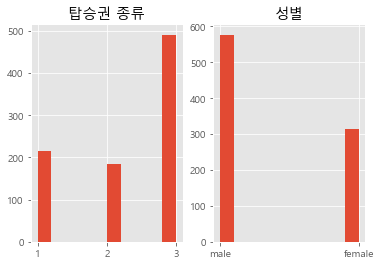

In [4]:
plt.subplot(1, 2, 1)  
plt.hist(data_train['Pclass'])
plt.xticks([1,2,3])
plt.title("탑승권 종류")

plt.subplot(1, 2, 2) 
plt.hist(data_train['Sex'])
plt.title("성별")

C:\Users\woo\AppData\Local\Temp/ipykernel_9328/3659301913.py:4: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Total', 'Survived')
C:\Users\woo\AppData\Local\Temp/ipykernel_9328/3659301913.py:4: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Total', 'Survived')
C:\Users\woo\AppData\Local\Temp/ipykernel_9328/3659301913.py:4: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Total', 'Survived')
C:\Users\woo\AppData\Local\Temp/ipykernel_9328/3659301913.py:4: Use

Text(0.5, 1.0, '탑승권 종류별 생존한 사람')

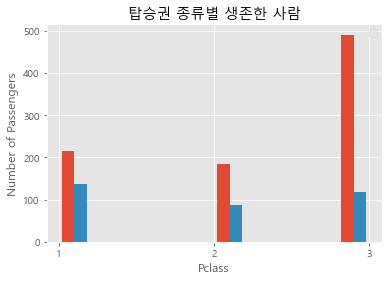

In [5]:
# red : 탑승한 승객 , blue : 생존한 사람 수
data_survived = data_train[data_train.Survived==1]
plt.hist([data_train['Pclass'], data_survived['Pclass']])
plt.legend('Total', 'Survived')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.xticks([1,2,3])
plt.title("탑승권 종류별 생존한 사람")

In [6]:
# 생존자 중 남자
survived_m = data_train[(data_train.Survived==1) & (data_train.Sex=='male')]

# 생종자 중 여자
survived_f = data_train[(data_train.Survived==1) & (data_train.Sex=='female')]

Text(0.5, 1.0, '생존자 중 남여 수')

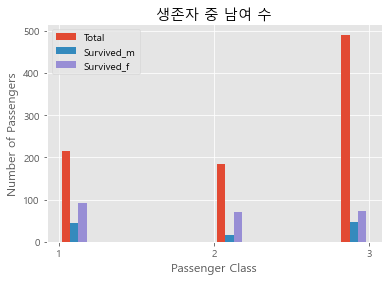

In [7]:
plt.hist([data_train['Pclass'], survived_m['Pclass'], survived_f['Pclass']])
plt.legend(['Total', 'Survived_m', 'Survived_f'])
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks([1,2,3])
plt.title("생존자 중 남여 수")

In [8]:
data_test = pd.read_csv("titanic//test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# test 데이터 길이만큼의 0으로 이뤄진 numpy 배열을 생성
answer = np.zeros((len(data_test), 2))

# 1번째 열(0번째 index)에 test 데이터의 PassengerId 값을 넣음
answer[:,0] = data_test['PassengerId']

# Pclass가 1이면 1, Pclass가 2이고 Sex가 여성이면 1, 아니면 모두 0
answer[(data_test.Pclass==1), 1] = 1
answer[(data_test.Pclass==2) & (data_test.Sex=='female'), 1] = 1

In [10]:
# Dataframe 생성
df_answer = pd.DataFrame(answer)

# column명 설정
df_answer.columns = ['PassengerId', 'Survived']

# Datafrmae 타입 변환
df_answer = df_answer.astype('int32') 
df_answer

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [11]:
# Result 
df_answer.to_csv('./test_predict_ex1.csv', index=False)